# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url_base = "https://api.openweathermap.org/data/2.5/weather?"# YOUR CODE HERE
units ="metric"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url_base + "q="+ city +"&appid="+ weather_api_key + "&units=" + units 
    # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']  # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']   # YOUR CODE HERE
        city_wind = city_weather['wind']['speed']  # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | flin flon
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | sopur
Processing Record 6 of Set 1 | cold lake
Processing Record 7 of Set 1 | rio gallegos
Processing Record 8 of Set 1 | colchani
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | windsor
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | stephenville
Processing Record 22 of Set 1 | khvoynaya
Processing Record

Processing Record 38 of Set 4 | pariaman
Processing Record 39 of Set 4 | chiredzi
Processing Record 40 of Set 4 | papao
Processing Record 41 of Set 4 | inarajan village
Processing Record 42 of Set 4 | princeville
Processing Record 43 of Set 4 | faya-largeau
Processing Record 44 of Set 4 | bembereke
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | jhinjhak
Processing Record 47 of Set 4 | ulety
Processing Record 48 of Set 4 | puerto deseado
Processing Record 49 of Set 4 | marinette
Processing Record 0 of Set 5 | atafu village
Processing Record 1 of Set 5 | nicoya
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | santa ana
Processing Record 4 of Set 5 | beau vallon
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | polyarnyy
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | yung shue wan
Processing Record 9 of Set 5 | namibe
Processing Record 10 of Set 5 | ambon
Processing Record 11 of Set 5 | iska

Processing Record 28 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 29 of Set 8 | ugoofaaru
Processing Record 30 of Set 8 | zagora
Processing Record 31 of Set 8 | marsh harbour
Processing Record 32 of Set 8 | arraial do cabo
Processing Record 33 of Set 8 | floro
Processing Record 34 of Set 8 | inhambane
Processing Record 35 of Set 8 | brookhaven
Processing Record 36 of Set 8 | tenenkou
Processing Record 37 of Set 8 | akcakale
Processing Record 38 of Set 8 | sal rei
Processing Record 39 of Set 8 | kattivakkam
Processing Record 40 of Set 8 | port alfred
Processing Record 41 of Set 8 | mitu
Processing Record 42 of Set 8 | viedma
Processing Record 43 of Set 8 | enewetak
Processing Record 44 of Set 8 | surovikino
Processing Record 45 of Set 8 | yanchep
Processing Record 46 of Set 8 | bamboo flat
Processing Record 47 of Set 8 | yampil'
Processing Record 48 of Set 8 | hargeysa
Processing Record 49 of Set 8 | wuhai
Processing Record 0 of Set 9 | mariinsk
Processing Record 

Processing Record 18 of Set 12 | raudales malpaso
City not found. Skipping...
Processing Record 19 of Set 12 | new norfolk
Processing Record 20 of Set 12 | lauro de freitas
Processing Record 21 of Set 12 | hashtpar
Processing Record 22 of Set 12 | ust'-ilimsk
Processing Record 23 of Set 12 | verkhnevilyuysk
Processing Record 24 of Set 12 | shasta lake
Processing Record 25 of Set 12 | camenca
Processing Record 26 of Set 12 | las veredas
Processing Record 27 of Set 12 | mana
Processing Record 28 of Set 12 | sanming
Processing Record 29 of Set 12 | la rioja
Processing Record 30 of Set 12 | dos hermanas
Processing Record 31 of Set 12 | troitsk
Processing Record 32 of Set 12 | costa calma
City not found. Skipping...
Processing Record 33 of Set 12 | muravlenko
Processing Record 34 of Set 12 | karratha
Processing Record 35 of Set 12 | saint-philippe
Processing Record 36 of Set 12 | selfoss
Processing Record 37 of Set 12 | ad dilam
Processing Record 38 of Set 12 | olyokminsk
Processing Record 

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.98,73,16,19.90,TF,1696017637
1,bilibino,68.0546,166.4372,-5.48,98,100,2.68,RU,1696017637
2,flin flon,54.7682,-101.8650,12.91,88,100,1.03,CA,1696017638
3,lompoc,34.6391,-120.4579,26.68,74,20,4.63,US,1696017638
4,sopur,34.3000,74.4667,11.56,48,6,2.44,IN,1696017638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

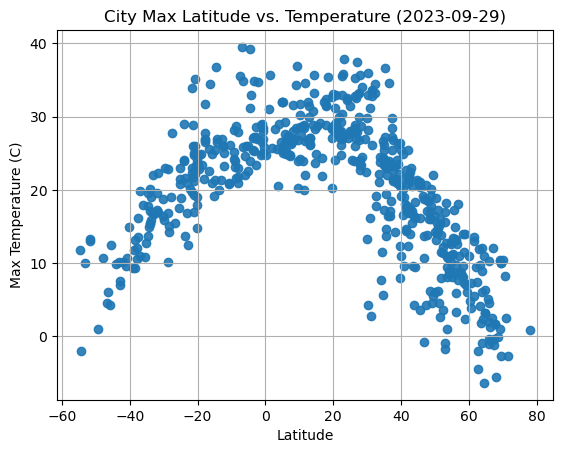

In [65]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], alpha = .9)
# YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-09-29)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

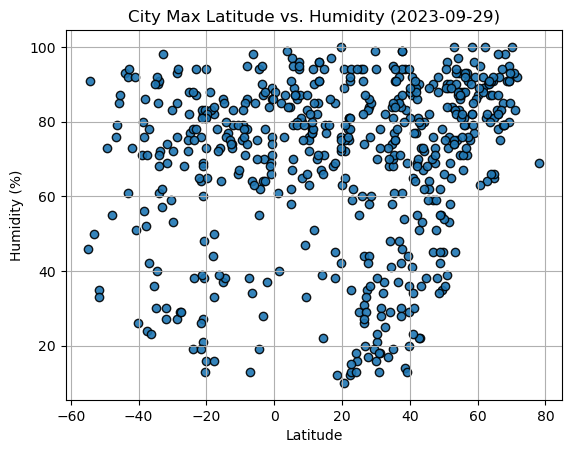

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], alpha = .9, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2023-09-29)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

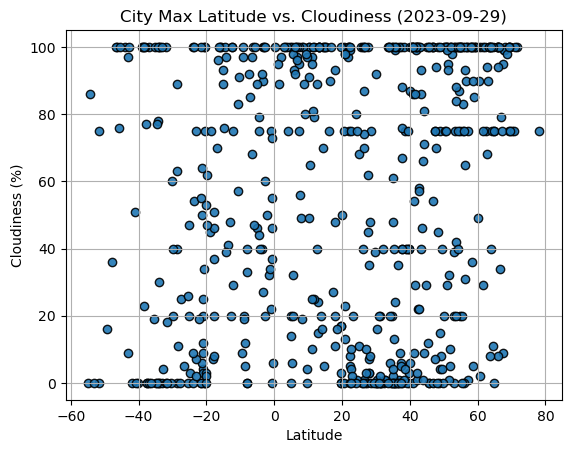

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], alpha = .9, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2023-09-29)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

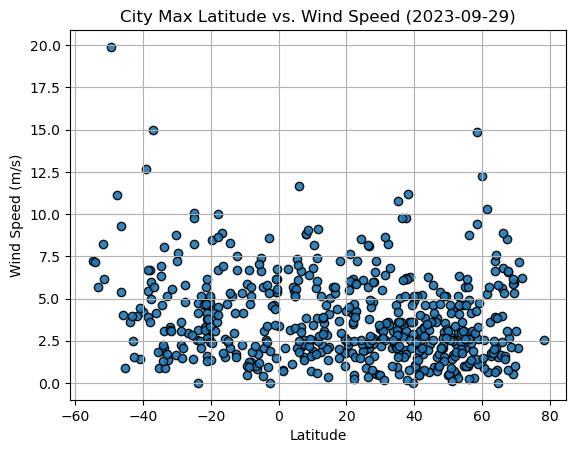

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], alpha = .9, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2023-09-29)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0] 


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,-5.48,98,100,2.68,RU,1696017637
2,flin flon,54.7682,-101.8650,12.91,88,100,1.03,CA,1696017638
3,lompoc,34.6391,-120.4579,26.68,74,20,4.63,US,1696017638
4,sopur,34.3000,74.4667,11.56,48,6,2.44,IN,1696017638
5,cold lake,54.4502,-110.2017,8.97,93,100,4.63,CA,1696017639


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.98,73,16,19.90,TF,1696017637
6,rio gallegos,-51.6226,-69.2181,13.03,35,0,6.17,AR,1696017393
7,colchani,-20.3000,-66.9333,17.89,13,0,5.05,BO,1696017639
8,edinburgh of the seven seas,-37.0676,-12.3116,10.96,78,100,14.97,SH,1696017639
10,hermanus,-34.4187,19.2345,14.95,90,78,4.59,ZA,1696017640


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.82


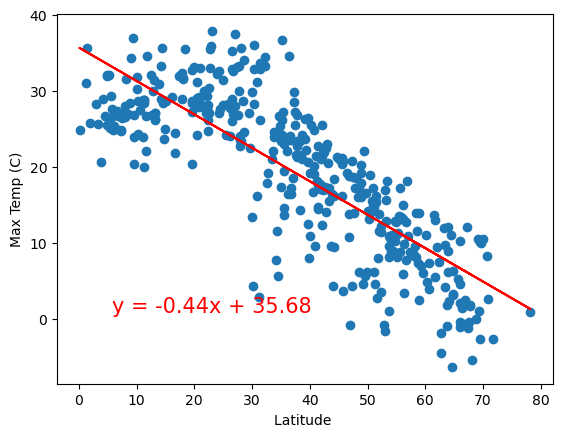

Discussion about the linear relationship: From the graph below we can see a negative slope hence an inversily proportional relation.
In other words, in the Northern Hemisphere, as the latitude increases the Max Temp. Decreases


In [112]:
# Linear regression on Northern Hemisphere
X_Values = northern_hemi_df["Lat"]
Y_Values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude ')
plt.ylabel('Max Temp (C)')
print(f"The r value is: {rvalue}")
plt.show()


#Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a negative slope hence an inversily proportional relation.")
print("In other words, in the Northern Hemisphere, as the latitude increases the Max Temp. Decreases")


The r value is: 0.8


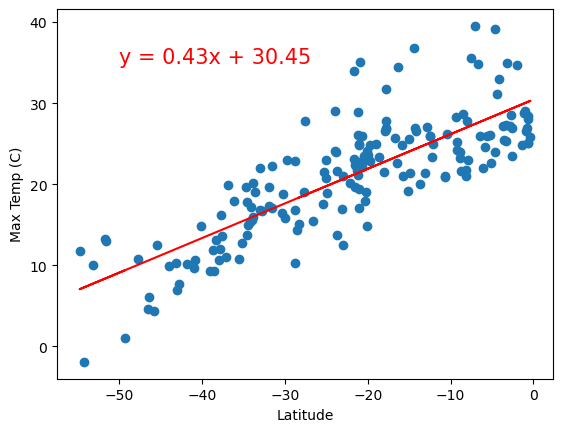

Discussion about the linear relationship: From the graph below we can see a positve slope hence an proportional relation.
In other words, in the Southern Hemisphere, as the latitude increases the Max Temp. Inrceases


In [111]:
# Linear regression on Southern Hemisphere
X_Values = southern_hemi_df["Lat"]
Y_Values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r value is: {rvalue}")
plt.show()


#Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a positve slope hence an proportional relation.")
print("In other words, in the Southern Hemisphere, as the latitude increases the Max Temp. Inrceases")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.17


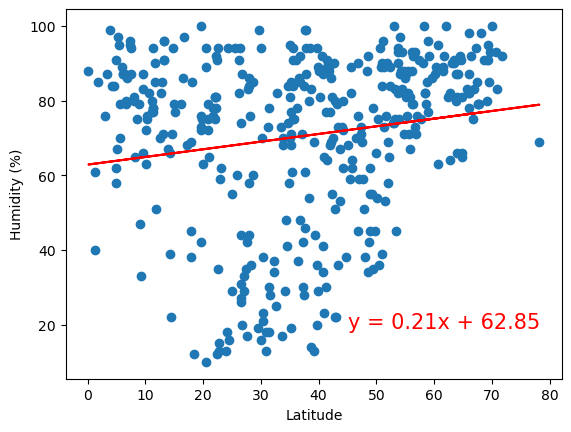

Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here


In [110]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
X_Values = northern_hemi_df["Lat"]
Y_Values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(45,19),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here")



The r value is: 0.09


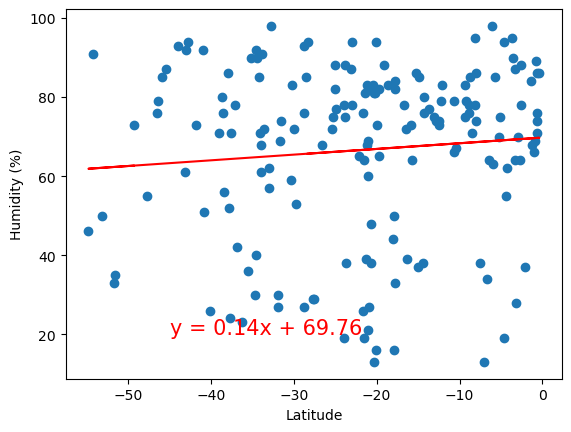

Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here


In [109]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
X_Values = southern_hemi_df["Lat"]
Y_Values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.11


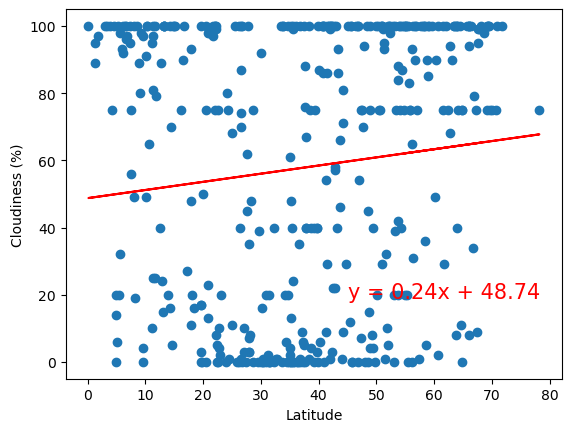

Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here


In [108]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
X_Values = northern_hemi_df["Lat"]
Y_Values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(45,19),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here")



The r value is: 0.1


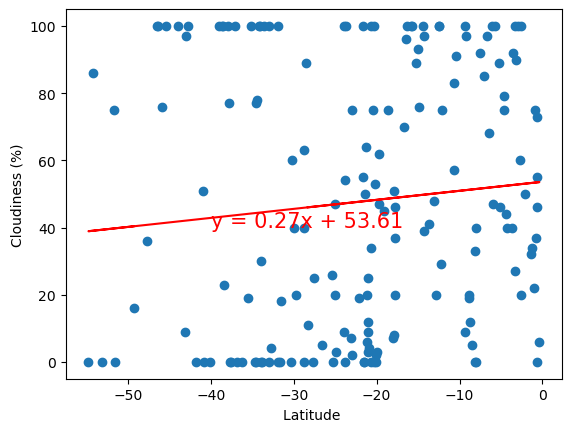

Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here


In [107]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
X_Values = southern_hemi_df["Lat"]
Y_Values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude ')
plt.ylabel('Cloudiness (%)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a positve slope. I dont really see strong coorelation here")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.06


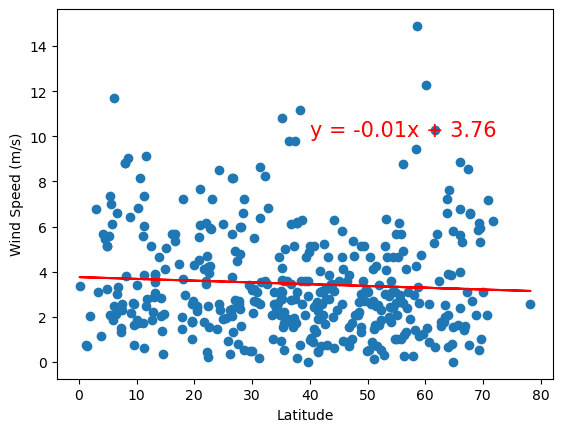

Discussion about the linear relationship: From the graph below we can see a sort of a negative slope. I dont really see strong coorelation here


In [106]:
# Northern Hemisphere
X_Values = northern_hemi_df["Lat"]
Y_Values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a negative slope. I dont really see strong coorelation here")



The r value is: -0.23


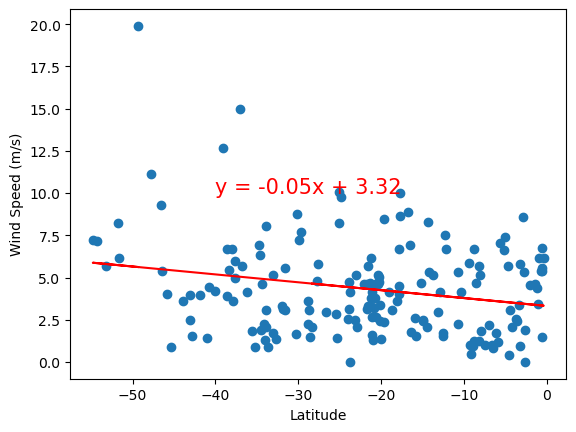

Discussion about the linear relationship: From the graph below we can see a sort of a negative slope. I dont really see strong coorelation here


In [115]:
# Southern Hemisphere
X_Values = southern_hemi_df["Lat"]
Y_Values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Values, Y_Values) 

#regression values
regress_vals = X_Values * slope + intercept

#regression formula 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

#plotting the scatter with regression line
plt.scatter(X_Values,Y_Values)
plt.plot(X_Values,regress_vals,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

rvalue=round(rvalue,2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r value is: {rvalue}")
plt.show()


# Printing analysis from my view 
print("Discussion about the linear relationship: From the graph below we can see a sort of a negative slope. I dont really see strong coorelation here")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [5]:
# cities

['port-aux-francais',
 'bilibino',
 'flin flon',
 'lompoc',
 'sopur',
 'cold lake',
 'rio gallegos',
 'colchani',
 'edinburgh of the seven seas',
 'aykhal',
 'hermanus',
 'tazovsky',
 'bethel',
 'windsor',
 'thompson',
 'adamstown',
 'waitangi',
 'lata',
 'margaret river',
 'albany',
 'stephenville',
 'khvoynaya',
 'yellowknife',
 'la sarre',
 'vadso',
 'isafjordur',
 'klyuchi',
 'tura',
 'new plymouth',
 'teofilo otoni',
 "'ohonua",
 'celestun',
 'happy valley-goose bay',
 'alzamay',
 'gaigeturi',
 'portland',
 'nacozari de garcia',
 'bel ombre',
 'devinuwara',
 "nar'yan-mar",
 "st. john's",
 'ushuaia',
 'grytviken',
 'laojunmiao',
 'ilulissat',
 'egersund',
 'ust-nera',
 'sydney',
 'kodiak',
 'ribeira grande',
 'puerto natales',
 'west island',
 'iqaluit',
 'puerto san carlos',
 'margate',
 'lihue',
 'keflavik',
 'puerto ayora',
 'tahe',
 'zaozersk',
 'xindian',
 'stanley',
 'college',
 'bredasdorp',
 'tadine',
 'novyy urengoy',
 'anse la raye',
 'trairi',
 'pisco',
 'tiksi',
 'susum

In [35]:
# units= "metric"
# url_base = "https://api.openweathermap.org/data/2.5/weather?"
# city_url = url_base + "q="+ "lompoc"+"&appid="+weather_api_key+ "&units=" + units 

In [36]:
# response= requests.get(city_url).json()

In [37]:
# city_url

'https://api.openweathermap.org/data/2.5/weather?q=lompoc&appid=d9231273113512f1440b35efdee79b6a&units=metric'

In [38]:
# cities[3]

'lompoc'

In [39]:
# response

{'coord': {'lon': -120.4579, 'lat': 34.6391},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 21.16,
  'feels_like': 21.29,
  'temp_min': 17.4,
  'temp_max': 27.05,
  'pressure': 1012,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 270},
 'clouds': {'all': 20},
 'dt': 1696016942,
 'sys': {'type': 2,
  'id': 2040507,
  'country': 'US',
  'sunrise': 1695995686,
  'sunset': 1696038569},
 'timezone': -25200,
 'id': 5367788,
 'name': 'Lompoc',
 'cod': 200}

In [40]:
# response['main']['temp_max']

27.05

In [41]:
# response['main']['temp_min']

17.4

In [51]:
# response['wind']['speed']

4.63

In [53]:
# response['sys']['country']

'US'

In [54]:
# response['dt']

1696016942

In [55]:
# url_base = "https://api.openweathermap.org/data/2.5/weather?"# YOUR CODE HERE
# units ="metric"
# city_url = url_base + "q="+ "LA" +"&appid="+ weather_api_key + "&units=" + units 

In [56]:
# city_url

'https://api.openweathermap.org/data/2.5/weather?q=LA&appid=d9231273113512f1440b35efdee79b6a&units=metric'